# Interference and Inhibition meta analysis
#### Code written by Scott Isherwood, Max Keuken
#### V.01

    Goal of the notebook is to run a coordinate based meta analysis using NiMARE. We are using NiMARE instead of GingerALE as the GingerALE code took forever to run and even then there was a chance of it just crashing. After a search for ohter coordinate based meta analysis software we came across NiMARE, a python package that allows you to run meta-analysis. A number of people are working on this package (e.g. Tal Yarkoni) but the main contact is Taylor Salo. 
    
    The notebook has 4 sections:
    a) Importing modules and setting parameters
    b) Selecting the relevant studies for a given contrast into an input file
    c) Prepare the input file for NiMARE
    d) Run the actual meta-analysis

## Import modules and setting parameters 

In [2]:
# Importing Modules
import os, shutil, nimare, numpy as np, nibabel as nb, pandas as pd
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from atlasreader import create_output
from glob import glob as glob
from ipywidgets import IntProgress
# Setting the paths 
projectFolder = '/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/MaxTrialDuration'
rawInputTxtFiles = os.path.join(projectFolder+'/coordinateTxtFiles')
inputDirNiMARE = os.path.join(projectFolder+'/nimare-Input')
outputDirNiMARE = os.path.join(projectFolder+'/nimare-Output')

# Setting a number of arrays to loop through
inputFilesRaw = ['contrastInhibitionInput.txt']
inputFilesNiMARE = ['contrastInhibitionInput.json']
contrastFoldersNiMARE = ['Inhibition']

# ALE Parameters
VoxelThresholdPvalue = 0.001
numberOfIterations = 10000
numberOfCores = 7

## Selecting the relevant studies for a given contrast into an input file

In [3]:
# Select all the relevant studies for that given contrast
#. 
#. Note that:
#. - there were 4 studies in talairach space that were first converted to MNI space using the icbm2tal tool as implemented in gingerALE (V3.0.2)
#. - there was 1 study that met al the inclusion criteria but did not find any significant clusters (Salzer et al. 2018) and was removed from the 
#.   analysis
#. 
# Get all the single coordinates as list
file_list = glob(rawInputTxtFiles+'/*.txt')

#####
# Define the different contrasts by selecting the corresponding txt files
#
# Inhibition contrast
#. The inhibition contrasts contains the SST and the GoNoGo tasks where we look at
#. Succesfull stop > succesfull go & NoGo > Go trials:
contrastInhibition = {s for s in file_list for xs in ['StopS>GoS', 'NoGo>Go'] if xs in s}
print('\nWe have the following number of contrasts included for the inhibition contrasts:', len(contrastInhibition))
#

#####
# Concatenate all the txt files that are part of the contrast
#. while starting each txt file on a new line.
contrasts = [contrastInhibition]
outputfiles = ['contrastInhibitionInput.txt']
# For the given contrasts concatenate the different studies in a single txt file 
#. what then is used as an input file for gingerALE:
for i in range(0, len(contrasts)):
    with open(os.path.join(inputDirNiMARE, outputfiles[i]), 'wb') as outputFile:
        for file in contrasts[i]:
            with open(file,'rb') as fd:
                shutil.copyfileobj(fd, outputFile)
            outputFile.write(b'\n')


We have the following number of contrasts included for the inhibition contrasts: 36


## Run the actual meta-analysis

In [4]:
# Running the main ALE contrasts analysis with NiMARE (v.0.0.5)
for i in range(len(inputFilesRaw)):
    print('\nStarting ALE analysis...')
    print(inputDirNiMARE+'/'+inputFilesRaw[i])
    nimare.io.convert_sleuth_to_json(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[i]), os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+inputFilesNiMARE[i]) )
    nimare.workflows.ale_sleuth_workflow(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[i]), 
                                         output_dir = os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'),
                                         prefix=contrastFoldersNiMARE[i], 
                                         n_iters= numberOfIterations, 
                                         v_thr= VoxelThresholdPvalue, 
                                         n_cores= numberOfCores)

INFO:nimare.workflows.ale:Loading coordinates...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:nimare.workflows.ale:Performing meta-analysis...



Starting ALE analysis...
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/MaxTrialDuration/nimare-Input/contrastInhibitionInput.txt


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.workflows.ale:Saving output maps...
INFO:nimare.workflows.ale:Workflow completed.
INFO:nimare.workflows.ale:
An activation likelihood estimation (ALE; Turkeltaub, Eden, Jones, & Zeffiro,
2002; Eickhoff, Bzdok, Laird, Kurth, & Fox, 2012; Turkeltaub et al., 2012)
meta-analysis was performed using NiMARE. The input dataset included 801
foci from 944 participants across 36 studies/experiments.

Modeled activation maps were generated for each study/experiment by convolving
each focus with a Gaussian kernel determined by sample size.
For voxels with overlapping kernels, the maximum value was retained.
The modeled activation maps were rendered in MNI 152 space (Fonov et al., 2009;
Fonov et al., 2011) at 2x2x2mm resolution. A map of ALE values was then
computed for the sample as the union of modeled activation values across
studies/experiments. Voxelwise statistical significance was determined based on
an analytically derived null distribution using the method described in
Eickhoff


Done! Showing the results:
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/MaxTrialDuration/nimare-Input/contrastInhibitionInput.txt


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,harvard_oxford,juelich
0,1,34,18,-4,3.71902,8848,37.88% Insula_R; 20.07% no_label; 17.63% Putam...,35.90% Right_Insular_Cortex; 27.03% Right_Fron...,56.96% no_label; 25.86% WM_Inferior_occipito-f...
1,2,46,6,36,3.71902,7976,39.92% Precentral_R; 25.88% Frontal_Inf_Oper_R...,38.82% Right_Middle_Frontal_Gyrus; 34.50% Righ...,49.45% GM_Broca's_area_BA44_R; 37.01% GM_Premo...
2,3,42,-62,-10,3.71902,4992,39.42% Temporal_Inf_R; 36.06% Fusiform_R; 12.9...,32.53% Right_Lateral_Occipital_Cortex_inferior...,49.68% no_label; 25.96% GM_Visual_cortex_V5_R;...
3,4,-40,-70,-8,3.71902,4696,34.41% Fusiform_L; 30.49% Occipital_Mid_L; 27....,51.79% Left_Lateral_Occipital_Cortex_inferior_...,38.16% GM_Visual_cortex_V5_L; 37.82% no_label;...
4,5,-32,18,-2,3.71902,4584,74.17% Insula_L; 9.77% Frontal_Inf_Tri_L; 8.38...,60.73% Left_Insular_Cortex; 18.32% Left_Fronta...,71.73% no_label; 15.18% GM_Broca's_area_BA44_L...
5,6,8,14,54,3.71902,3832,57.83% Supp_Motor_Area_R; 29.02% Supp_Motor_Ar...,57.41% Right_Superior_Frontal_Gyrus; 15.45% Ri...,78.50% GM_Premotor_cortex_BA6_R; 19.21% GM_Pre...
6,7,58,-44,8,3.71902,2488,64.31% Temporal_Mid_R; 35.69% Temporal_Sup_R,57.23% Right_Middle_Temporal_Gyrus_temporoocci...,38.26% GM_Inferior_parietal_lobule_Pga_R; 32.8...
7,8,34,-60,46,3.71902,2160,28.52% Angular_R; 27.78% Parietal_Inf_R; 24.07...,59.63% Right_Lateral_Occipital_Cortex_superior...,46.67% GM_Anterior_intra-parietal_sulcus_hIP3_...
8,9,62,-42,26,3.71902,1816,76.65% SupraMarginal_R; 23.35% Temporal_Sup_R,81.50% Right_Supramarginal_Gyrus_posterior_div...,55.07% GM_Inferior_parietal_lobule_PFm_R; 43.6...
9,10,-30,-90,4,3.71902,1528,98.95% Occipital_Mid_L,45.03% Left_Lateral_Occipital_Cortex_inferior_...,45.55% GM_Visual_cortex_V3V_L; 16.23% no_label...


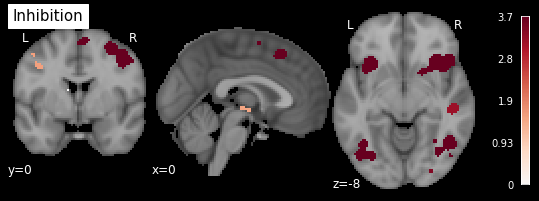

In [5]:
for i in range(len(inputFilesRaw)):
    print('\nDone! Showing the results:')
    print(inputDirNiMARE+'/'+inputFilesRaw[i])
    zmap = nb.nifti1.load(os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+contrastFoldersNiMARE[i]+'_z_level-cluster_corr-FWE_method-montecarlo.nii.gz'))
    plot_stat_map(
        zmap,
        cut_coords=[0, 0, -8],
        draw_cross=False,
        cmap="RdBu_r",
        title= contrastFoldersNiMARE[i],
        black_bg=True
    )
    
    
    # Use atlas reader to extract the cluster table
    # Using the Z value associated with a onesided p=0.05 to threshold the Z-map
    # Note that the cluster corrected map will have binary clusters in terms of values.
    # Therefore you will only get the COM of a cluster, which also means that it can actually be 
    # OUTSIDE of a given cluster.. (due to it's geometric shape). This is why I', using Atlas reader
    # because it will output the overlap of the entire cluster given the areas
    create_output(zmap, 
                  outdir= os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'), 
                  atlas= ['aal', 'harvard_oxford', 'juelich'], 
                  voxel_thresh=1.645, 
                  direction = 'pos', 
                  cluster_extent = 64)
    overlapClusters = pd.read_csv(os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+'atlasreader_clusters.csv'))
    display(overlapClusters)